In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


# Load the dataset

In [159]:
a1 = pd.read_csv('Amazon.csv')
a1

,id,Amazon Standard Identification Number,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [160]:
a1.shape

(1597, 27)

In [161]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     1597 non-null   object 
 1   Amazon Standard Identification Number  1597 non-null   object 
 2   brand                                  1597 non-null   object 
 3   categories                             1597 non-null   object 
 4   colors                                 774 non-null    object 
 5   dateAdded                              1597 non-null   object 
 6   dateUpdated                            1597 non-null   object 
 7   dimension                              565 non-null    object 
 8   ean                                    898 non-null    float64
 9   keys                                   1597 non-null   object 
 10  manufacturer                           965 non-null    object 
 11  manu

In [162]:
a1.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,8.980000e+02,900.000000,1177.000000,0.0,0.0,0.0,8.980000e+02
mean,8.446269e+11,83.584444,4.359388,NaN,NaN,NaN,8.446269e+11
std,3.391252e+09,197.150238,1.021445,NaN,NaN,NaN,3.391252e+09
min,8.420000e+11,0.000000,1.000000,NaN,NaN,NaN,8.420000e+11
25%,8.420000e+11,0.000000,4.000000,NaN,NaN,NaN,8.420000e+11
50%,8.420000e+11,0.000000,5.000000,NaN,NaN,NaN,8.420000e+11
75%,8.490000e+11,34.000000,5.000000,NaN,NaN,NaN,8.490000e+11
max,8.490000e+11,997.000000,5.000000,NaN,NaN,NaN,8.490000e+11


In [163]:
a1.isnull().sum()

id                                          0
Amazon Standard Identification Number       0
brand                                       0
categories                                  0
colors                                    823
dateAdded                                   0
dateUpdated                                 0
dimension                                1032
ean                                       699
keys                                        0
manufacturer                              632
manufacturerNumber                        695
name                                        0
prices                                      0
reviews.date                              380
reviews.doRecommend                      1058
reviews.numHelpful                        697
reviews.rating                            420
reviews.sourceURLs                          0
reviews.text                                0
reviews.title                              17
reviews.userCity                  

In [164]:
a1['id'] = a1['id'].str.replace('_','')
a1

,id,Amazon Standard Identification Number,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnDxQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnDxQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnDxQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnDxQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnDxQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnDxfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnDxfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnDxfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnDxfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [165]:
a1['id'] = a1['id'].str.upper()

In [166]:
a1 = pd.DataFrame(a1)
a1.drop(columns=['colors','dateAdded','dateUpdated','dimension','ean','keys','manufacturer','manufacturerNumber','name','prices','reviews.doRecommend','reviews.userCity','reviews.userProvince','sizes','upc','weight'],axis=1,inplace=True)

In [167]:
a1

,id,Amazon Standard Identification Number,brand,categories,reviews.date,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2015-08-08T00:00:00.000Z,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2015-09-01T00:00:00.000Z,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2015-07-20T00:00:00.000Z,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2017-06-16T00:00:00.000Z,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-08-11T00:00:00.000Z,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic
...,...,...,...,...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-07-06T00:00:00.000Z,9.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-06-22T00:00:00.000Z,41.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-03-31T00:00:00.000Z,34.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-26T00:00:00Z,7.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley


In [168]:
a1.isnull().sum()

id                                         0
Amazon Standard Identification Number      0
brand                                      0
categories                                 0
reviews.date                             380
reviews.numHelpful                       697
reviews.rating                           420
reviews.sourceURLs                         0
reviews.text                               0
reviews.title                             17
reviews.username                          17
dtype: int64

In [169]:
a1[['review_date','timezone']] = a1['reviews.date'].str.split("T",expand=True)
a1

,id,Amazon Standard Identification Number,brand,categories,reviews.date,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,review_date,timezone
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2015-08-08T00:00:00.000Z,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,2015-08-08,00:00:00.000Z
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2015-09-01T00:00:00.000Z,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,2015-09-01,00:00:00.000Z
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2015-07-20T00:00:00.000Z,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,2015-07-20,00:00:00.000Z
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2017-06-16T00:00:00.000Z,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,2017-06-16,00:00:00.000Z
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-08-11T00:00:00.000Z,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,2016-08-11,00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-07-06T00:00:00.000Z,9.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4,2016-07-06,00:00:00.000Z
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-06-22T00:00:00.000Z,41.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer,2016-06-22,00:00:00.000Z
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-03-31T00:00:00.000Z,34.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer,2016-03-31,00:00:00.000Z
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-26T00:00:00Z,7.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley,2016-04-26,00:00:00Z


In [170]:
a1.drop(columns=['reviews.date'],axis=1,inplace=True)
a1

,id,Amazon Standard Identification Number,brand,categories,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,review_date,timezone
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,2015-08-08,00:00:00.000Z
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,2015-09-01,00:00:00.000Z
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,2015-07-20,00:00:00.000Z
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,2017-06-16,00:00:00.000Z
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,2016-08-11,00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",9.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4,2016-07-06,00:00:00.000Z
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",41.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer,2016-06-22,00:00:00.000Z
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",34.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer,2016-03-31,00:00:00.000Z
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",7.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley,2016-04-26,00:00:00Z


In [171]:
a1.tail(10)

,id,Amazon Standard Identification Number,brand,categories,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,review_date,timezone
1587,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",177.0,2.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I am now having to order my third remote becau...,On my third replacement remote...,Amazon Customer,2016-03-11,00:00:00.000Z
1588,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",164.0,2.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,Don't bother paying for one or getting a repla...,Don't Buy It.,L. Ellis,NaN,NaN
1589,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",16.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I've had the REPLACEMENT remote 3 months and i...,Not what I expected from an Amazon produced pr...,Donna Albea,NaN,NaN
1590,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",136.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,Voice remote gave out nearly a year after I pu...,"OEM Remote gave out after 12 months, consideri...",Nathaniel,2016-03-21,00:00:00.000Z
1591,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",35.0,2.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,Purchased my first one with the TV Fire box ov...,My voice remote controller pooed out,Lisandro E. Roque,NaN,NaN
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",9.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4,2016-07-06,00:00:00.000Z
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",41.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer,2016-06-22,00:00:00.000Z
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",34.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer,2016-03-31,00:00:00.000Z
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",7.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley,2016-04-26,00:00:00Z
1596,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",10.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I ordered this item to replace the one that no...,I am sending all of this crap back to amazon a...,DIANE K,2016-07-31,00:00:00Z


In [172]:
a1.drop(columns=['timezone','brand','categories','reviews.sourceURLs','review_date'],axis=1,inplace=True)
a1

,id,Amazon Standard Identification Number,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic
...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,9.0,3.0,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,41.0,1.0,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,34.0,1.0,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,7.0,3.0,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley


In [173]:
a1.rename(columns={'reviews.numHelpful':'reviews_numHelpful','reviews.rating':'reviews_rating','reviews.text':'reviews','reviews.title':'reviews_summary','reviews.username':'reviews_username'}, inplace=True)

In [174]:
a1.head(3)

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner


In [178]:
a1['reviews_rating']=a1['reviews_rating'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [179]:
a1

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic
...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,9.0,3.0,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,41.0,1.0,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,34.0,1.0,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,7.0,3.0,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley


In [180]:
a1['reviews_numHelpful'] = a1['reviews_numHelpful'].astype(int)
a1

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [181]:
a1

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic
...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,9.0,3.0,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,41.0,1.0,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,34.0,1.0,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,7.0,3.0,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley


In [182]:
a1.reviews.head(20)

0     I initially had trouble deciding between the p...
1     Allow me to preface this with a little history...
2     I am enjoying it so far. Great for reading. Ha...
3     I bought one of the first Paperwhites and have...
4     I have to say upfront - I don't like coroporat...
5     My previous kindle was a DX, this is my second...
6     Allow me to preface this with a little history...
7     Just got mine right now. Looks the same as the...
8     I initially had trouble deciding between the p...
9     I am enjoying it so far. Great for reading. Ha...
10    As reviewed by the wife This is the perfect th...
11    My new Kindle Paperwhite came from the USA to ...
12    I am enjoying it so far. Great for reading. Ha...
13    Had older model, that you could text to speech...
14    This is a review of the Kindle Paperwhite laun...
15    I love my kindle! I got one for my fiance on h...
16    Vraiment bon petit appareil , lger et facile d...
17    Exactly what it is supposed to be. Works g

In [183]:
a1.reviews_summary.head(20)

0                        Paperwhite voyage, no regrets!
1                     One Simply Could Not Ask For More
2            Great for those that just want an e-reader
3                              Love / Hate relationship
4                                             I LOVE IT
5     Great device for reading. 8 people found this ...
6     One Simply Could Not Ask For More 28 people fo...
7     Definitely better than the previous generation...
8     Paperwhite voyage, no regrets! 16 people found...
9     Great for those that just want an e-reader 19 ...
10    Give this to a book-loving-new-mommy-who-breas...
11    Trouble-free international shipping, and easy ...
12    Great for those that just want an e-reader 18 ...
13                               Liked the smaller size
14    Superb reading device - but which one's best f...
15                                           I love it!
16                                           Un plaisir
17            Works great and I love the built-i

# Text Preprocessing

In [184]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [185]:
# Convet text in lower case 
a1['reviews'] = a1['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [186]:
# removing punctuations
a1['reviews'] = a1['reviews'].str.replace('[^\w\s]', "")
a1.reviews.head(20)

0     i initially had trouble deciding between the p...
1     allow me to preface this with a little history...
2     i am enjoying it so far. great for reading. ha...
3     i bought one of the first paperwhites and have...
4     i have to say upfront - i don't like coroporat...
5     my previous kindle was a dx, this is my second...
6     allow me to preface this with a little history...
7     just got mine right now. looks the same as the...
8     i initially had trouble deciding between the p...
9     i am enjoying it so far. great for reading. ha...
10    as reviewed by the wife this is the perfect th...
11    my new kindle paperwhite came from the usa to ...
12    i am enjoying it so far. great for reading. ha...
13    had older model, that you could text to speech...
14    this is a review of the kindle paperwhite laun...
15    i love my kindle! i got one for my fiance on h...
16    vraiment bon petit appareil , lger et facile d...
17    exactly what it is supposed to be. works g

In [187]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words = 'english')

In [189]:
words = tv.fit_transform(a1.reviews)
words

<1597x6195 sparse matrix of type '<class 'numpy.float64'>'
	with 90193 stored elements in Compressed Sparse Row format>

In [190]:
a1.reviews.head(10)

0    i initially had trouble deciding between the p...
1    allow me to preface this with a little history...
2    i am enjoying it so far. great for reading. ha...
3    i bought one of the first paperwhites and have...
4    i have to say upfront - i don't like coroporat...
5    my previous kindle was a dx, this is my second...
6    allow me to preface this with a little history...
7    just got mine right now. looks the same as the...
8    i initially had trouble deciding between the p...
9    i am enjoying it so far. great for reading. ha...
Name: reviews, dtype: object

In [191]:
# Removing stop words
stop_words = set(stopwords.words('english'))
a1['reviews'] = a1['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
a1.reviews.head(10)

0    initially trouble deciding paperwhite voyage r...
1    allow preface little history. (was) casual rea...
2    enjoying far. great reading. original fire sin...
3    bought one first paperwhites pleased constant ...
4    say upfront - like coroporate, hermetically cl...
5    previous kindle dx, second kindle years. love ...
6    allow preface little history. (was) casual rea...
7    got mine right now. looks previous generation ...
8    initially trouble deciding paperwhite voyage r...
9    enjoying far. great reading. original fire sin...
Name: reviews, dtype: object

#spelling correction
a1['reviews'] = a1['reviews'].apply(lambda x: str(TextBlob(x).correct()))
a1.reviews.head(20)

# Lemmatization

In [192]:
a1['reviews'] = a1['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
a1.reviews.head(20)

0     initially trouble deciding paperwhite voyage r...
1     allow preface little history. (was) casual rea...
2     enjoying far. great reading. original fire sin...
3     bought one first paperwhites pleased constant ...
4     say upfront - like coroporate, hermetically cl...
5     previous kindle dx, second kindle years. love ...
6     allow preface little history. (was) casual rea...
7     got mine right now. look previous generation e...
8     initially trouble deciding paperwhite voyage r...
9     enjoying far. great reading. original fire sin...
10    reviewed wife perfect thing new mommy love rea...
11    new kindle paperwhite came usa small town swed...
12    enjoying far. great reading. original fire sin...
13    older model, could text speech, one hasn't. li...
14    review kindle paperwhite launched july 2015. e...
15    love kindle! got one fiance birthday, loved it...
16    vraiment bon petit appareil , lger et facile e...
17    exactly supposed be. work great love built

# Look at the summary Text using wordcloud

In [193]:
#pip install wordcloud

In [194]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [195]:
a1.columns

Index(['id', 'Amazon Standard Identification Number', 'reviews_numHelpful',
       'reviews_rating', 'reviews', 'reviews_summary', 'reviews_username'],
      dtype='object')

In [196]:
a1.reviews_rating.value_counts()

reviews_rating
5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: count, dtype: int64

<Axes: xlabel='reviews_rating', ylabel='count'>

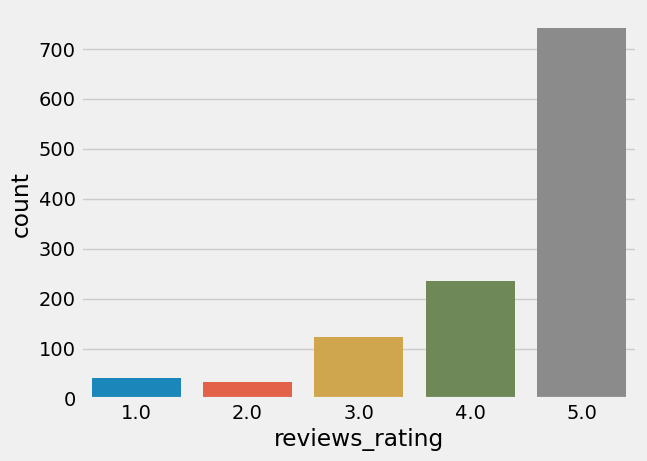

In [197]:
sns.countplot(data = a1, x = 'reviews_rating')

In [198]:
# Create a new data frame "review_analysis" to perform exploratory data analysis upon that
review_analysis = a1
# Dropping null values
review_analysis.dropna(inplace=True)

In [199]:
score_1 = review_analysis[review_analysis['reviews_rating'] == 1]
score_2 = review_analysis[review_analysis['reviews_rating'] == 2]
score_3 = review_analysis[review_analysis['reviews_rating'] == 3]
score_4 = review_analysis[review_analysis['reviews_rating'] == 4]
score_5 = review_analysis[review_analysis['reviews_rating'] == 5]

In [200]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [201]:
a1['length_of_reviews'] = a1['reviews'].apply(len)

In [202]:
a1['length_of_reviews'].describe()

count     900.000000
mean      325.583333
std       388.192928
min         0.000000
25%        65.000000
50%       133.500000
75%       372.500000
max      1732.000000
Name: length_of_reviews, dtype: float64

In [203]:
a1

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username,length_of_reviews
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,674
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,909
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,117
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal,1103
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic,1280
...,...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,9.0,3.0,remote got alexa-echo control volume.... think...,I would be disappointed with myself if i produ...,GregAmandawith4,203
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,41.0,1.0,change battery remote twice per month since pu...,Battery draining remote!!!!,Amazon Customer,440
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,34.0,1.0,"remote activate, connect box.a poorly designed...",replacing an even worse remote. Waste of time,Amazon Customer,180
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,7.0,3.0,job super priced. feel like offer replacement ...,Overpriced,Meg Ashley,162


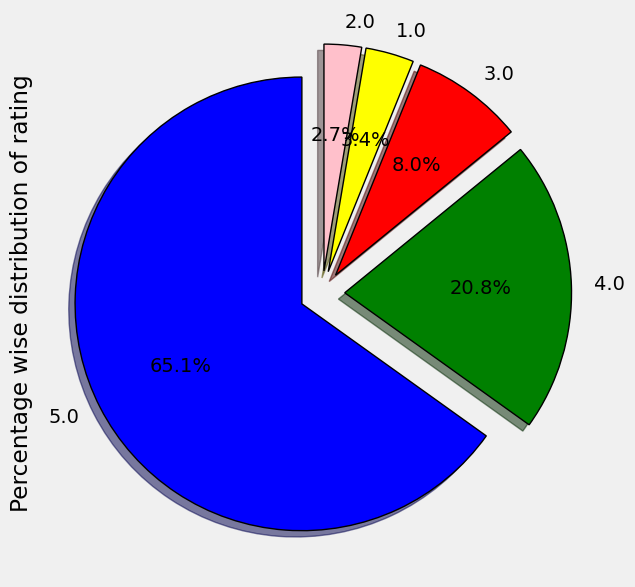

In [204]:
fig = plt.figure(figsize=(7,7))
colors = ('blue','green', 'red', 'yellow', 'pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = a1['reviews_rating'].value_counts()/a1.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, 
          label='Percentage wise distribution of rating')

from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

[Text(0.5, 1.0, 'Distribution of length of review ')]

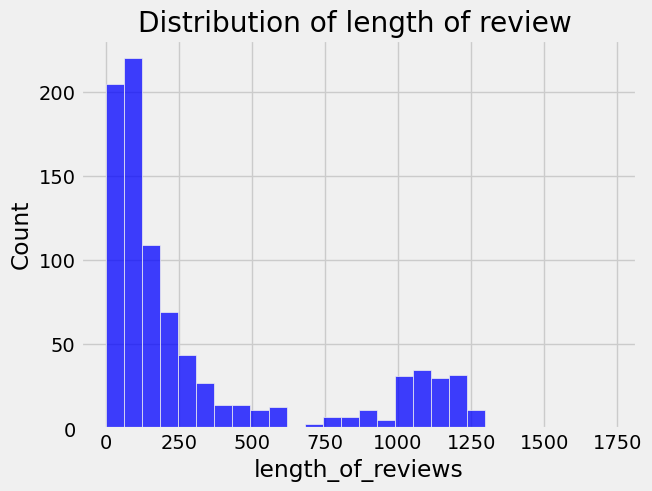

In [205]:
sns.histplot(a1['length_of_reviews'],color='blue').set(title='Distribution of length of review ')

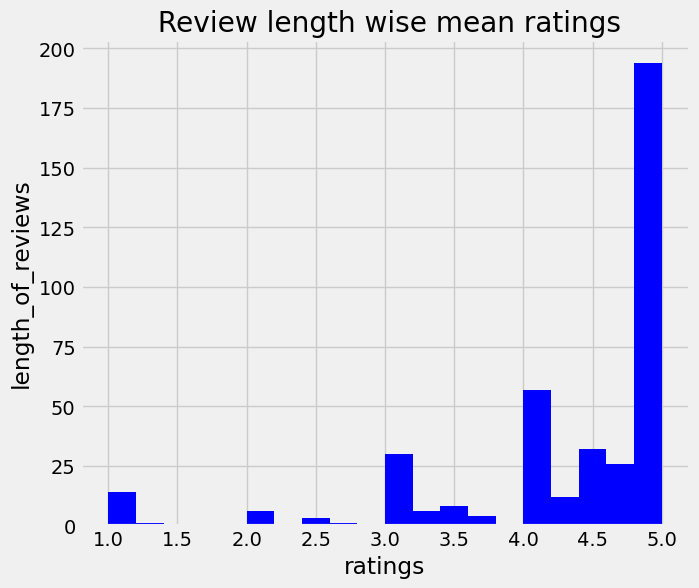

In [206]:
a1.groupby('length_of_reviews')['reviews_rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length_of_reviews')
plt.show()

In [207]:
def create_new_rating(a1):
  """
  This function creates a new column 'new_rating' in the dataframe 'a1'.
  The new column assigns 1 to ratings of 4 and 5, and 0 to ratings of 2 and 3.
  """
  a1['feedback'] = a1['reviews_rating'].apply(lambda x: 1 if x >= 4 else 0)
  return a1

a1 = create_new_rating(a1.copy())

In [208]:
a1

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username,length_of_reviews,feedback
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,674,1
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,909,1
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,117,1
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal,1103,1
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic,1280,1
...,...,...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,9.0,3.0,remote got alexa-echo control volume.... think...,I would be disappointed with myself if i produ...,GregAmandawith4,203,0
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,41.0,1.0,change battery remote twice per month since pu...,Battery draining remote!!!!,Amazon Customer,440,0
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,34.0,1.0,"remote activate, connect box.a poorly designed...",replacing an even worse remote. Waste of time,Amazon Customer,180,0
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,7.0,3.0,job super priced. feel like offer replacement ...,Overpriced,Meg Ashley,162,0


In [209]:
a1['feedback'].value_counts()

feedback
1    773
0    127
Name: count, dtype: int64

In [210]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(a1['feedback'].value_counts()/a1.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    85.89
0    14.11
Name: count, dtype: float64


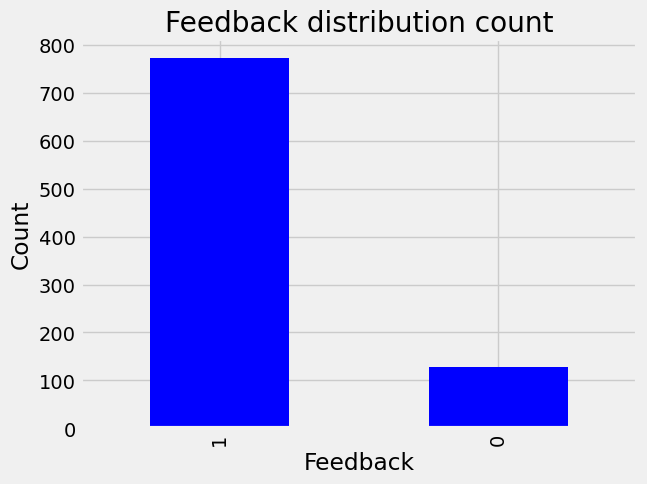

In [211]:
#Bar graph to visualize the total counts of each feedback

a1['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Percentage wise distrubution of feedback'>

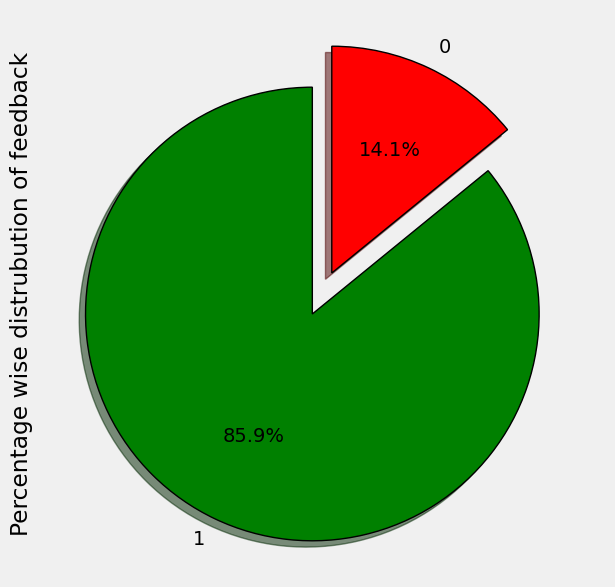

In [212]:
fig = plt.figure(figsize=(7,7))
colors = ('green', 'red')
wp = {'linewidth':1, "edgecolor":'black'}
tags = a1['feedback'].value_counts()/a1.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, 
          label='Percentage wise distrubution of feedback')

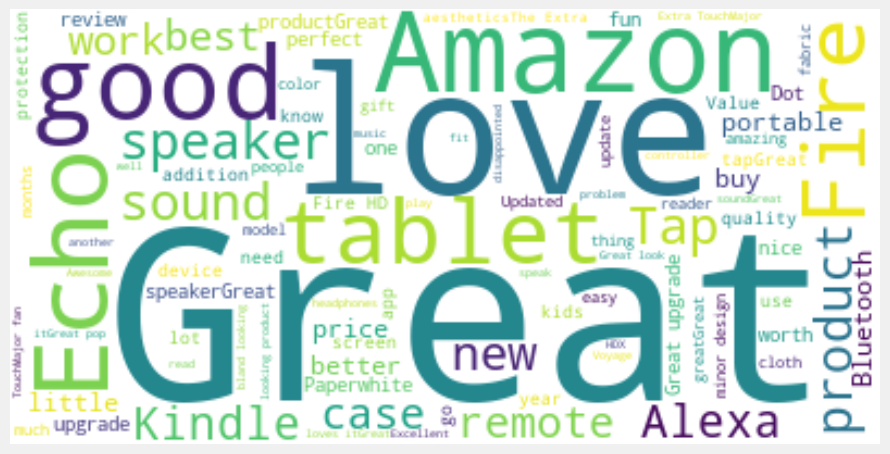

In [213]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly I can build for Text column

reviews_str = reviews_sample.reviews_summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [214]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['reviews_rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['reviews_rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.reviews_summary.str.cat()
positive_reviews_str = positive_reviews.reviews_summary.str.cat()

# Create WordCloud

Text(0.5, 1.0, 'Reviews with Negative Scores')

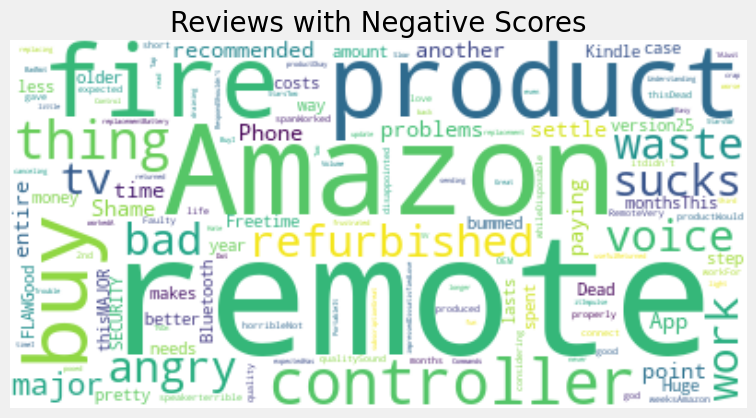

In [215]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

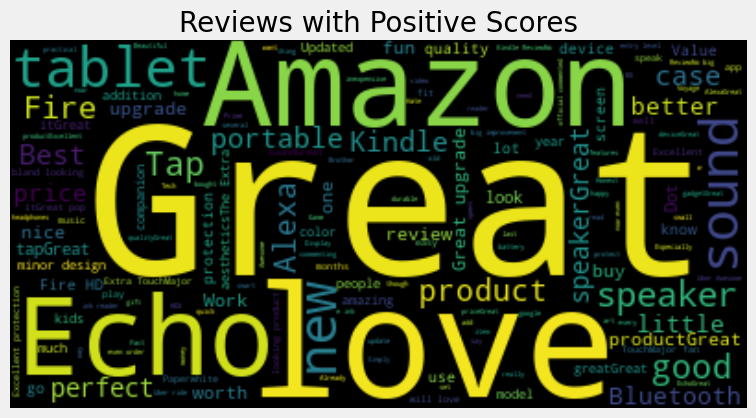

In [216]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

# Sentiment Score

In [217]:
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [218]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in a1['reviews']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
a1_sentiments=pd.DataFrame(emptyline)
a1_sentiments.head()

,neg,neu,pos,compound
0,0.058,0.697,0.245,0.9661
1,0.049,0.717,0.234,0.9849
2,0.273,0.400,0.327,0.3818
3,0.040,0.781,0.179,0.9678
4,0.045,0.639,0.316,0.9954


In [219]:
# Merging the sentiments back to reviews dataframe
a1_c = pd.concat([a1.reset_index(drop=True), a1_sentiments], axis=1)
a1_c.head(3)

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username,length_of_reviews,feedback,neg,neu,pos,compound
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,674,1,0.058,0.697,0.245,0.9661
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,909,1,0.049,0.717,0.234,0.9849
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,117,1,0.273,0.400,0.327,0.3818


In [220]:
# Convert scores into positive and negetive sentiments using some threshold
a1_c['Sentiment'] = np.where(a1_c['compound'] >= 0 , 'Positive','Negative')
a1_c.head(5)

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username,length_of_reviews,feedback,neg,neu,pos,compound,Sentiment
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,674,1,0.058,0.697,0.245,0.9661,Positive
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,909,1,0.049,0.717,0.234,0.9849,Positive
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,117,1,0.273,0.400,0.327,0.3818,Positive
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal,1103,1,0.040,0.781,0.179,0.9678,Positive
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic,1280,1,0.045,0.639,0.316,0.9954,Positive


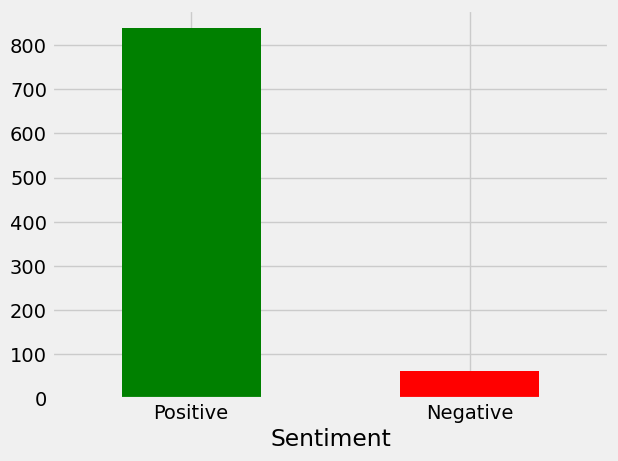

In [221]:
result=a1_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['green','red']);

In [222]:
a1.to_csv('cleaned_amazondata.csv')

In [223]:
a1

,id,Amazon Standard Identification Number,reviews_numHelpful,reviews_rating,reviews,reviews_summary,reviews_username,length_of_reviews,feedback
0,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,139.0,5.0,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,674,1
1,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,126.0,5.0,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,909,1
2,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,69.0,4.0,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,117,1
3,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,2.0,5.0,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal,1103,1
4,AVPE7ASMILAPNDXQ78G,B00QJDU3KY,17.0,5.0,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic,1280,1
...,...,...,...,...,...,...,...,...,...
1592,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,9.0,3.0,remote got alexa-echo control volume.... think...,I would be disappointed with myself if i produ...,GregAmandawith4,203,0
1593,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,41.0,1.0,change battery remote twice per month since pu...,Battery draining remote!!!!,Amazon Customer,440,0
1594,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,34.0,1.0,"remote activate, connect box.a poorly designed...",replacing an even worse remote. Waste of time,Amazon Customer,180,0
1595,AVPFO9UKILAPNDXFHUJ,B00NO8JJZW,7.0,3.0,job super priced. feel like offer replacement ...,Overpriced,Meg Ashley,162,0


In [224]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re

In [225]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, a1.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', a1.iloc[i]['reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in stop_words]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words

In [226]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3500)

In [227]:
#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = a1['feedback'].values

In [228]:
import pickle

In [229]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

Checking shape of X and y

In [230]:
X.shape

(900, 3063)

In [231]:
y.shape

(900,)

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [234]:
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (630, 3063)
y train: (630,)
X test: (270, 3063)
y test: (270,)


In [235]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 15
X test max value: 16


Scale X_train and X_test so that the values are between 0 and 1

In [236]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [237]:
X_train_scl = mms.fit_transform(X_train)
X_test_scl = mms.transform(X_test)

In [238]:
#Saving the scaler model
pickle.dump(mms, open('scaler.pkl', 'wb'))

# Applying Naive Bayes Classification

In [239]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [240]:
NB.fit(X_train_scl,y_train)

GaussianNB()

In [241]:
from sklearn.metrics import accuracy_score

In [242]:
#Accuracy of the Naive Bayes Classification model on training and testing data
 
print("Training Accuracy :", NB.score(X_train_scl, y_train))
print("Testing Accuracy :", NB.score(X_test_scl, y_test))

Training Accuracy : 0.8523809523809524
Testing Accuracy : 0.7222222222222222


In [243]:
#Predicting on the test set
y_pred =NB.predict(X_test_scl)

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [245]:
cm = confusion_matrix(y_test,y_pred)

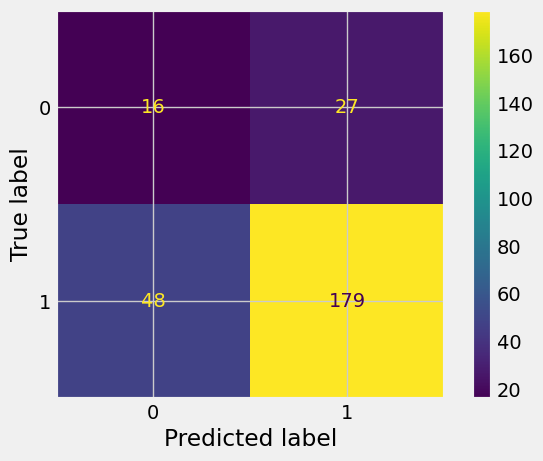

In [246]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB.classes_)
cm_display.plot()
plt.show()

# Applying Support Vector Machine

In [247]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear') 

In [248]:
svm_model.fit(X_train_scl,y_train)

SVC(kernel='linear')

In [249]:
from sklearn.metrics import accuracy_score

In [250]:
#Accuracy of the Support Vector Machine model on training and testing data
 
print("Training Accuracy :", svm_model.score(X_train_scl, y_train))
print("Testing Accuracy :", svm_model.score(X_test_scl, y_test))

Training Accuracy : 0.9888888888888889
Testing Accuracy : 0.837037037037037


In [251]:
#Predicting on the test set
y_pred =svm_model.predict(X_test_scl)

In [252]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [253]:
cm = confusion_matrix(y_test,y_pred)

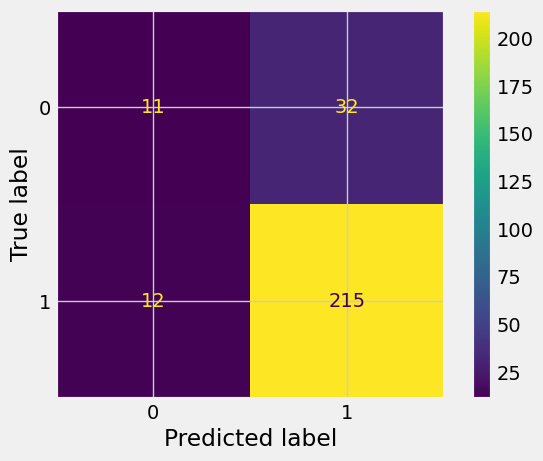

In [254]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
cm_display.plot()
plt.show()

# Applying XgBoost

In [255]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [256]:
xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [257]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9920634920634921
Testing Accuracy : 0.8703703703703703


In [258]:
y_preds = xgb.predict(X_test)

In [259]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 18  25]
 [ 11 216]]


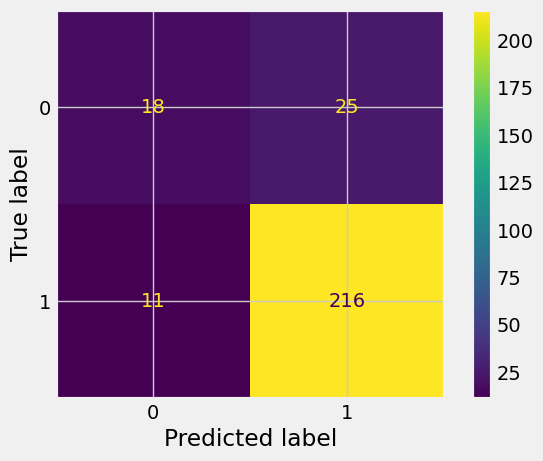

In [260]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
cm_display.plot()
plt.show()

In [118]:
#Saving the XGBoost classifier
pickle.dump(xgb, open('model_xgb.pkl', 'wb'))